<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/class_work/Classwork_oct20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
RealEstate = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/Real_estate.csv")

In [4]:
RealEstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [5]:
RealEstate.tail()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5
413,2013.500,6.5,90.45606,9,63.9


In [6]:
RealEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transaction_date              414 non-null    float64
 1   house_age                     414 non-null    float64
 2   distance_nearest_MRT_station  414 non-null    float64
 3   convenience_stores            414 non-null    int64  
 4   house_price_unit_area         414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


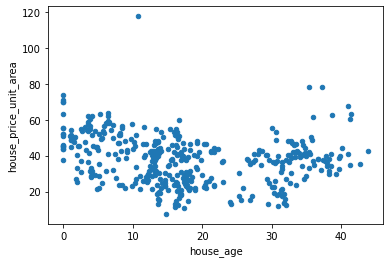

In [8]:
RealEstate.plot('house_age','house_price_unit_area', kind="scatter")

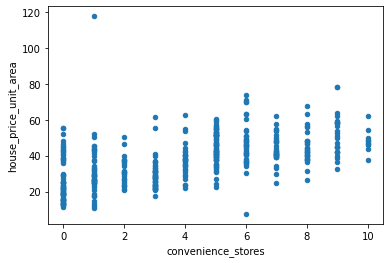

In [10]:
RealEstate.plot('convenience_stores','house_price_unit_area', kind="scatter")

In [11]:
features= RealEstate[["house_age", "convenience_stores"]]
target= RealEstate["house_price_unit_area"]

In [12]:
features.shape

(414, 2)

In [13]:
target.shape

(414,)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
mlr=LinearRegression()

In [16]:
mlr.fit(features, target)

LinearRegression()

In [18]:
print("r^2 of the model ={0:.1f}%".format(mlr.score(features, target)*100))

r^2 of the model =38.3%


In [19]:
mlr.intercept_

32.02251473732663

In [20]:
mlr.coef_

array([-0.28601262,  2.69251293])

In [21]:
RealEstate["prediction"] = mlr.predict(features)

In [22]:
RealEstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,prediction
0,2012.917,32.0,84.87882,10,37.9,49.795240
1,2012.917,19.5,306.59470,9,42.2,50.677885
2,2013.583,13.3,561.98450,5,47.3,41.681112
3,2013.500,13.3,561.98450,5,54.8,41.681112
4,2012.833,5.0,390.56840,5,43.1,44.055016


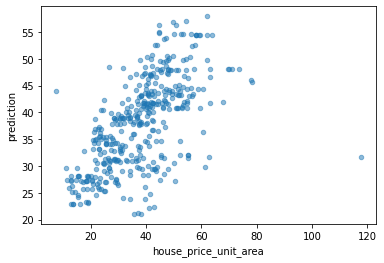

In [23]:
RealEstate.plot("house_price_unit_area", "prediction", kind="scatter", alpha=0.5);

In [24]:
features

,house_age,convenience_stores
0,32.0,10
1,19.5,9
2,13.3,5
3,13.3,5
4,5.0,5
...,...,...
409,13.7,0
410,5.6,9
411,18.8,7
412,8.1,5


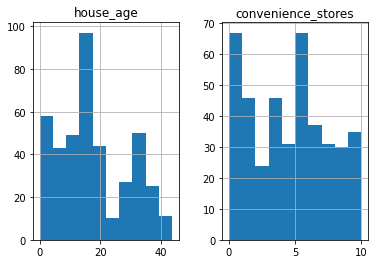

In [25]:
features.hist();

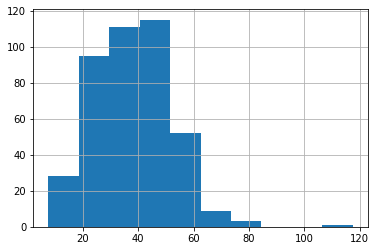

In [26]:
target.hist();

standardization
array_s=(array-mean)/standard_deviation

In [31]:
features_s= (features-features.mean())/features.std()
target_s= (target- target.mean())/target.std()

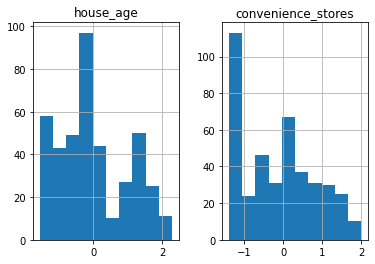

In [32]:
features_s.hist();

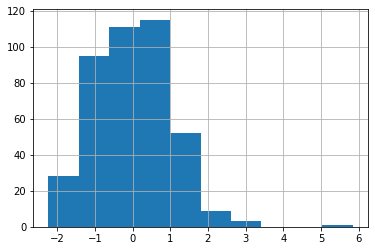

In [33]:
target_s.hist();

In [34]:
mlr_s= LinearRegression()

In [35]:
mlr_s.fit(features_s, target_s)

LinearRegression()

In [36]:
mlr.score(features, target)

0.3832531624493465

In [37]:
mlr_s.score(features_s, target_s)

0.3832531624493465

In [38]:
mlr.coef_

array([-0.28601262,  2.69251293])

In [39]:
mlr_s.coef_

array([-0.23947358,  0.58288101])

array_n = (array - min) / (max-min)

In [40]:
import statsmodels.formula.api as smf

In [41]:
df = features_s
df["target"] = target_s

In [42]:
df.head()

,house_age,convenience_stores,target
0,1.254111,2.004982,-0.005894
1,0.156896,1.665488,0.310132
2,-0.387322,0.307513,0.684953
3,-0.387322,0.307513,1.236161
4,-1.115873,0.307513,0.376277


In [43]:
model=smf.ols(formula='target ~ house_age + convenience_stores', data=df)

In [44]:
results=model.fit()

In [45]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           7.36e-44
Time:                        20:36:17   Log-Likelihood:                -486.90
No. Observations:                 414   AIC:                             979.8
Df Residuals:                     411   BIC:                             991.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.119e-16      0

In [46]:
mlr.intercept_

32.02251473732663